In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

In [4]:
prefix = 'simple_6_'
df = pd.read_csv(f'results/{prefix}semstamp_sentence.csv')
df

,P,Num,Origin,simple_6_A_normal,simple_6_B_normal,simple_6_A_flipped,simple_6_B_flipped,simple_6_A_count,simple_6_B_count,simple_6_choice,simple_6_flipped_choice
0,Evan strolled into the charming café on Rue Cl...,0,A,0.8,0.2,0.2,0.8,0.5,0.5,B,A
1,Evan strolled along the charming streets of Mo...,0,B,1.0,0.0,0.2,0.8,0.6,0.4,A,A
2,Evan strolled into the charming café on Rue Cl...,1,A,0.8,0.2,0.2,0.8,0.5,0.5,B,A
3,Evan strolled along the charming streets of Mo...,1,B,0.8,0.2,0.4,0.6,0.6,0.4,A,A
4,Evan strolled into the charming café on Rue Cl...,2,A,0.6,0.4,0.2,0.8,0.4,0.6,B,B
...,...,...,...,...,...,...,...,...,...,...,...
225,As he wandered through the picturesque streets...,112,B,1.0,0.0,0.6,0.4,0.8,0.2,A,A
226,"Evan ducked into the quaint Rue Cler café, esc...",113,A,0.8,0.2,0.4,0.6,0.6,0.4,A,A
227,As he wandered through the picturesque streets...,113,B,1.0,0.0,0.2,0.8,0.6,0.4,A,A
228,"Evan ducked into the quaint Rue Cler café, esc...",114,A,0.6,0.4,0.2,0.8,0.4,0.6,B,B


In [5]:
def summary(prefix=""):
    df[f'{prefix}correct'] = (df['Origin'] == df[f'{prefix}choice']).astype(float)
    df[f'{prefix}flipped_correct'] = (df['Origin'] == df[f'{prefix}flipped_choice']).astype(float)
    df[f'{prefix}avg_correct'] = (df[f'{prefix}correct']+df[f'{prefix}flipped_correct'])/2
    print(f"Correct: {df[f'{prefix}correct'].mean()}, Flipped Correct: {df[f'{prefix}flipped_correct'].mean()}, Avg Correct: {df[f'{prefix}avg_correct'].mean()}")

summary(prefix)

Correct: 0.40869565217391307, Flipped Correct: 0.47391304347826085, Avg Correct: 0.44130434782608696


In [4]:
dropdown = widgets.Dropdown(
    options=['avg_correct', 'correct', 'flipped_correct'],
    value='avg_correct',
    description='Statistic:',
)

origin = widgets.Dropdown(
    options=['A', 'B', 'Both'],
    value='Both',
    description='Origin:',
)

slider = widgets.IntSlider(min=1, max=20, step=1, value=1, description='Window:')

def plot(prefix=""):
    match origin.value:
        case 'A':
            data = df[df['Origin'] == 'A'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            # fall through
        case 'B':
            data = df[df['Origin'] == 'B'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
        case 'Both':
            tmp1 = df[df['Origin'] == 'A'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            tmp2 = df[df['Origin'] == 'B'][f'{prefix}{dropdown.value}'].reset_index(drop=True)
            data = (tmp1+tmp2)/2
    
    rolling_mean = data.rolling(window=slider.value).mean()
    plt.title(f'{prefix}{dropdown.value} (window={slider.value}, origin={origin.value})')
    plt.xlabel('Mutation number')
    plt.ylabel('Accuracy')
    plt.ylim(-0.1, 1.1)
    plt.yticks([0, 0.5, 1])
    plt.plot(rolling_mean, color='orange')
    plt.show()

widgets.interact(lambda x, y, z: plot(prefix), x=dropdown, y=slider, z=origin)

interactive(children=(Dropdown(description='Statistic:', options=('avg_correct', 'correct', 'flipped_correct')…

<function __main__.<lambda>(x, y, z)>

0
Correct: 0.8666666666666667, Flipped Correct: 0.9333333333333333, Avg Correct: 0.9
5
Correct: 0.9666666666666667, Flipped Correct: 0.9333333333333333, Avg Correct: 0.95
9
Correct: 0.9666666666666667, Flipped Correct: 0.9333333333333333, Avg Correct: 0.95
20
Correct: 0.7972972972972973, Flipped Correct: 0.7702702702702703, Avg Correct: 0.7837837837837838
25
Correct: 0.7, Flipped Correct: 0.8714285714285714, Avg Correct: 0.7857142857142857
29
Correct: 0.7870370370370371, Flipped Correct: 0.9259259259259259, Avg Correct: 0.8564814814814815
30
Correct: 0.7948717948717948, Flipped Correct: 0.905982905982906, Avg Correct: 0.8504273504273504
35
Correct: 0.82, Flipped Correct: 0.92, Avg Correct: 0.87
39
Correct: 0.775, Flipped Correct: 0.72, Avg Correct: 0.7475
70
Correct: 0.8725, Flipped Correct: 0.895, Avg Correct: 0.88375
75
Correct: 0.735, Flipped Correct: 0.7925, Avg Correct: 0.76375
79
Correct: 0.85, Flipped Correct: 0.7775, Avg Correct: 0.81375


/tmp/ipykernel_886781/2632638861.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{prefix}correct'] = (df['Origin'] == df[f'{prefix}choice']).astype(float)
/tmp/ipykernel_886781/2632638861.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{prefix}flipped_correct'] = (df['Origin'] == df[f'{prefix}flipped_choice']).astype(float)
/tmp/ipykernel_886781/2632638861.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

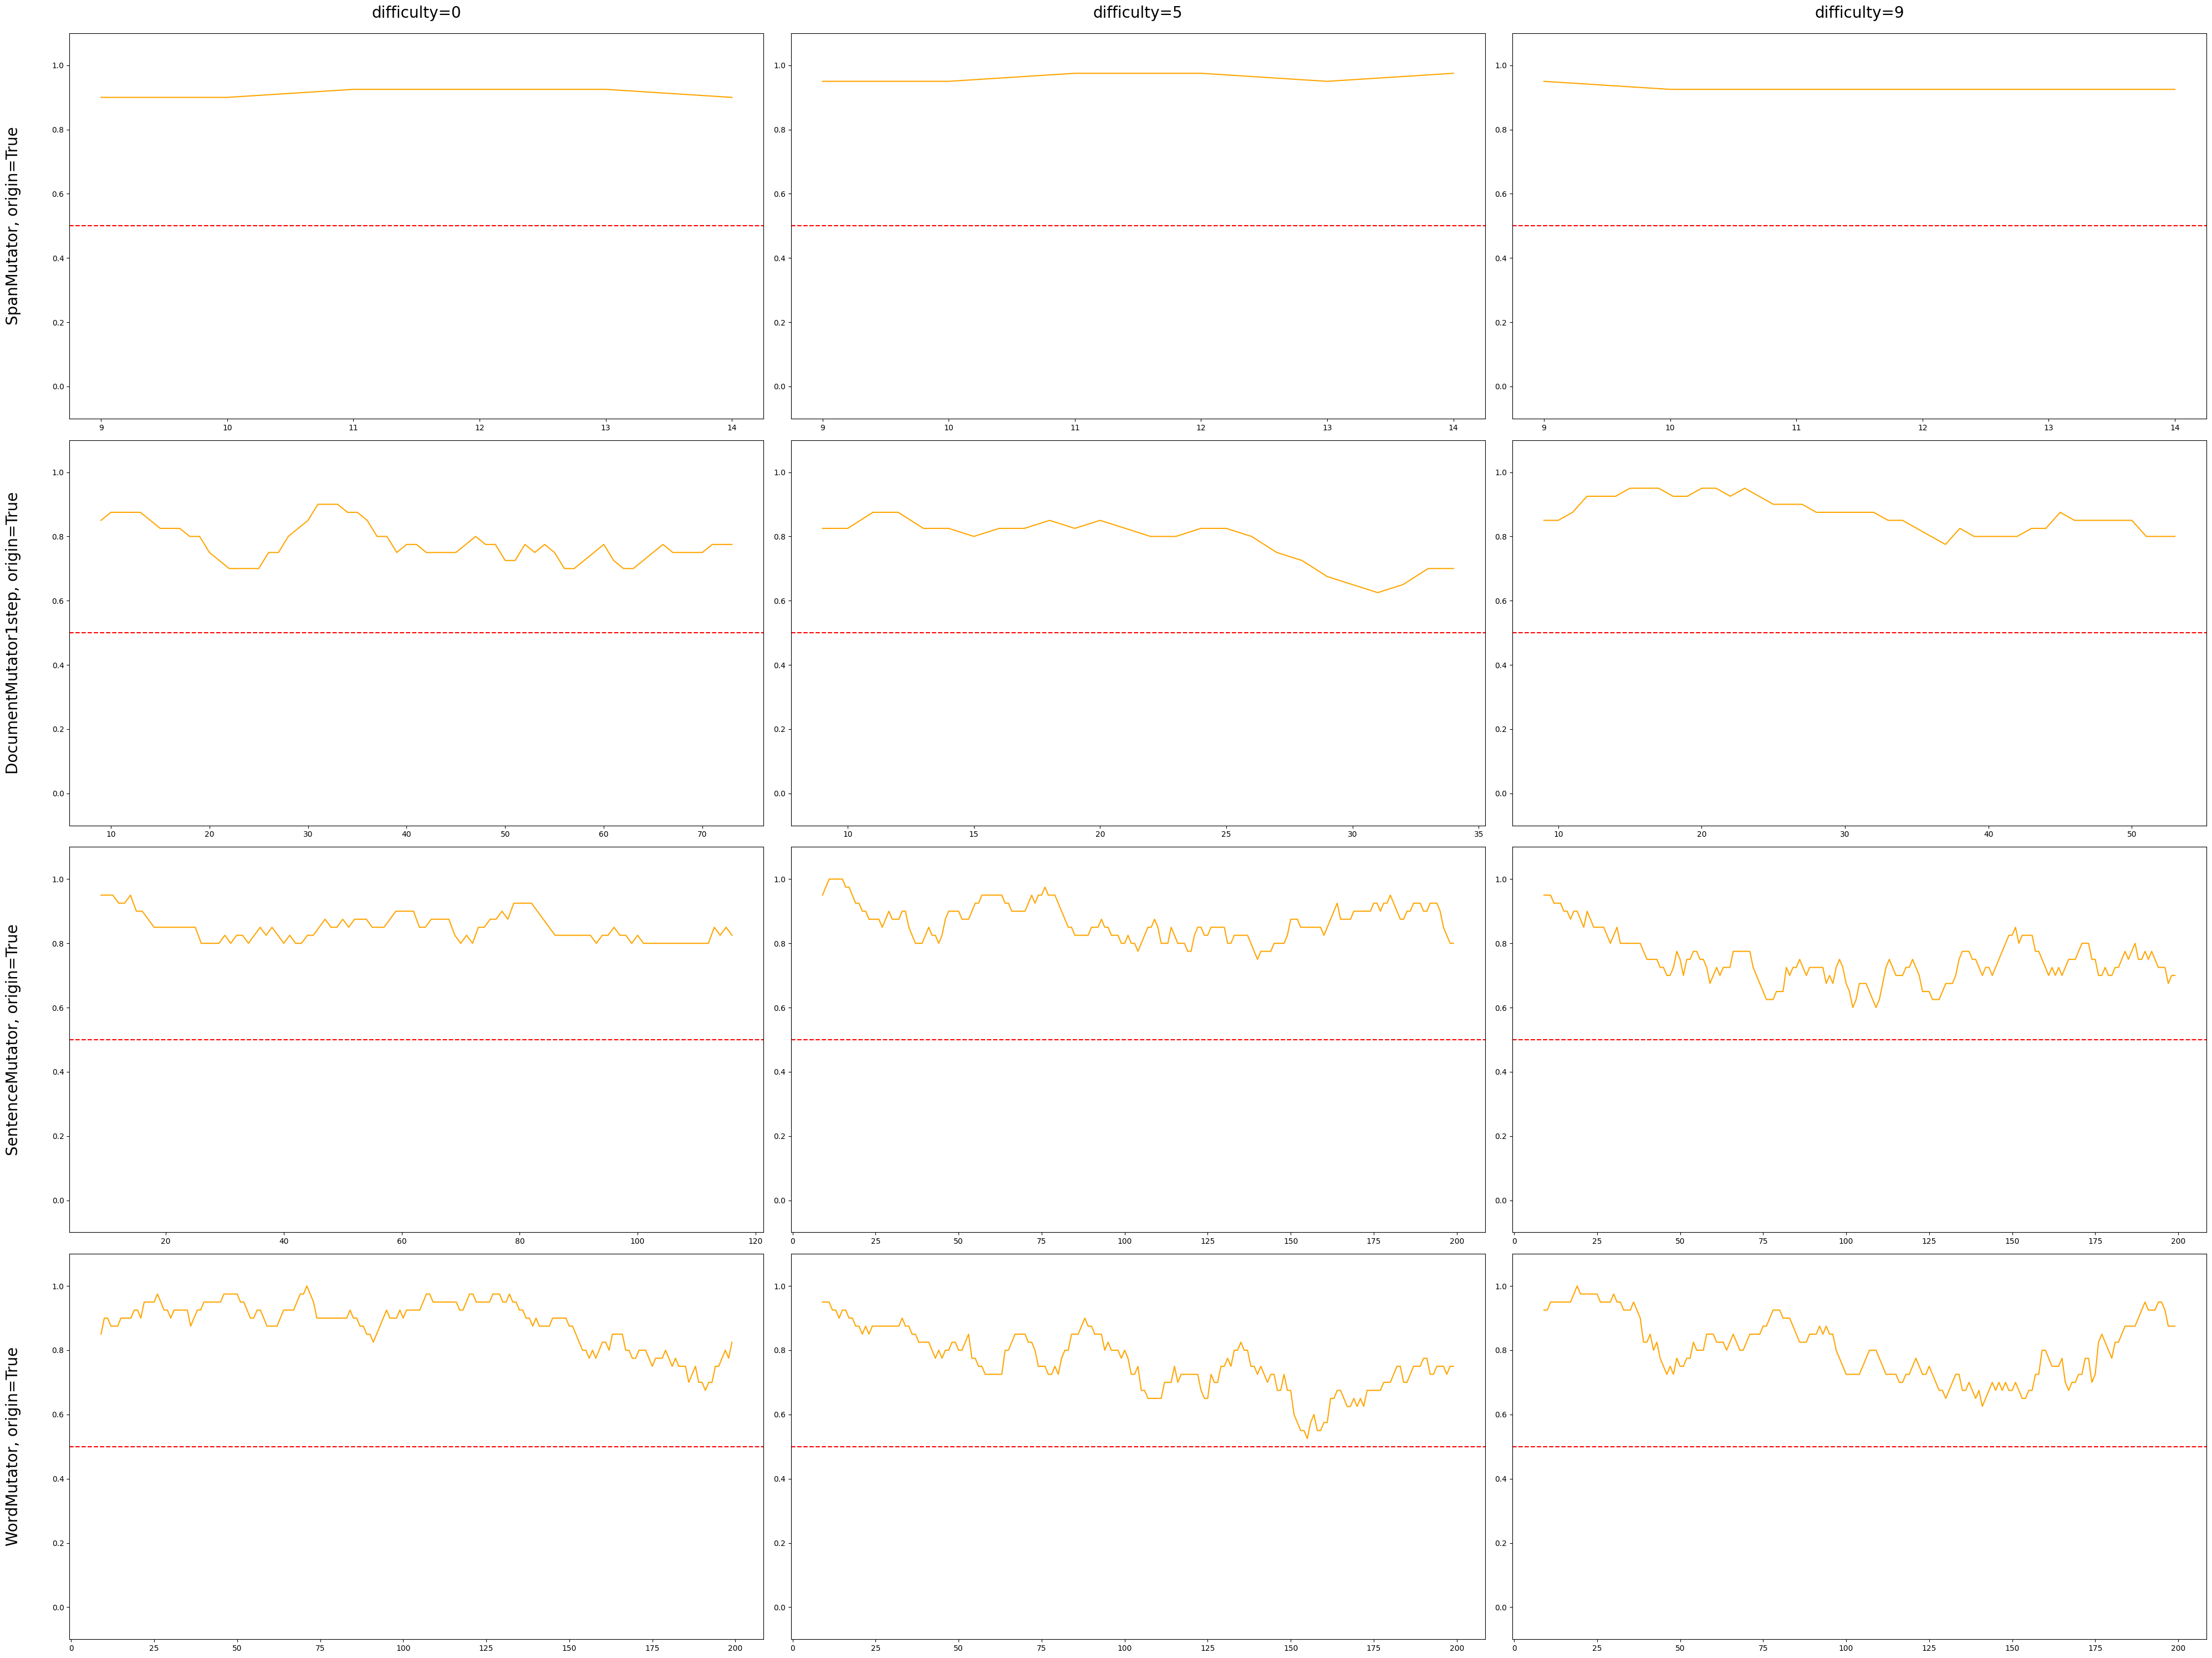

In [21]:
experiments = 8
prompts = 10
trials = experiments * prompts

n_rows = [0,2,3,7]
n_cols = [0,5,9]

fig, axes = plt.subplots(len(n_rows), len(n_cols), figsize=(40, 30))

tdf = pd.read_csv(f'results/stationary_distribution_full.csv')

def summary(df, prefix=""):
    df[f'{prefix}correct'] = (df['Origin'] == df[f'{prefix}choice']).astype(float)
    df[f'{prefix}flipped_correct'] = (df['Origin'] == df[f'{prefix}flipped_choice']).astype(float)
    df[f'{prefix}avg_correct'] = (df[f'{prefix}correct']+df[f'{prefix}flipped_correct'])/2
    print(f"Correct: {df[f'{prefix}correct'].mean()}, Flipped Correct: {df[f'{prefix}flipped_correct'].mean()}, Avg Correct: {df[f'{prefix}avg_correct'].mean()}")

for i in range(trials):
    t_row = i // prompts
    t_col = i % prompts
    if t_row not in n_rows or t_col not in n_cols:
        continue
    row = n_rows.index(t_row)
    col = n_cols.index(t_col)
    df = tdf[tdf['id'] == i]
    print(i)
    summary(df)
    tmp1 = df[df['Origin'] == 'A']['avg_correct'].reset_index(drop=True)
    tmp2 = df[df['Origin'] == 'B']['avg_correct'].reset_index(drop=True)
    data = (tmp1+tmp2)/2
    rolling_mean = data.rolling(window=10).mean() 
    axes[row, col].plot(rolling_mean, color='orange')
    if row == 0:
        axes[row, col].set_title(f'difficulty={df.iloc[0]["entropy"]}', fontsize=20, pad=20)
    if col == 0:
        axes[row, col].set_ylabel(f'{df.iloc[0]["m_str"]}, origin={df.iloc[0]["compare_against_original"]}', fontsize=20, labelpad=40)
    axes[row, col].axhline(y=0.5, color='red', linestyle='--')
    axes[row,col].set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()
